# LOWESS / LOESS Implimentation

Author: Sahngyoon Rhee

**LOWESS**, or Locally Weighted Scatterplot Smoothing, and **LOESS**, or Locally Estimated Scatterplot Smoothing, are regression methods that create a smooth curve through a set of data points. The lowess and loess algorithms are beneficial since they can capture complex relationship in the given data without assuming a specific functional form, such as a line or a polynomial. This greatly improves the accuracy of the regression compared to other models like linear regression or polynomial regression.

The algorithms work by fittinsimplear model- linear function for LOWESS and quadratic function for LOESS - s to localized subsets of the data, giving more weight to points near the target point. This localized fitting process is repeated for each point in the dataset, resulting in a smooth curve that adapts to the underlying data structure

In the following code, we impliment both algorithms using a synthetically generated set of points.hod. This approach helps in visualizing and understanding the underlying patterns in the data.

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

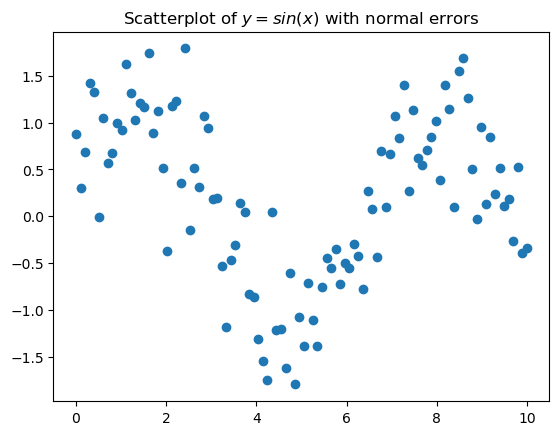

In [4]:
# Generate some example data that we'll use
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.5, x.shape)

# plot the given data

plt.title("Scatterplot of $y = sin(x)$ with normal errors") 
plt.scatter(x,y)
plt.show()

## LOWESS algorithm

We now apply the LOWESS algorithm using `statsmodels` package. The `frac` parameter in the `lowess` method specifies the fraction of the data used when estimating each y-value. It controls the smoothness of the fit; lower `frac` values will result in a less smooth fit, as fewer datapoints are considered for each local regression. Higher frac values willl result in a smoother fit, as more data points are considred for each local regression. If needed in application, we can play around with varying values of `frac` until we get desired line.on.

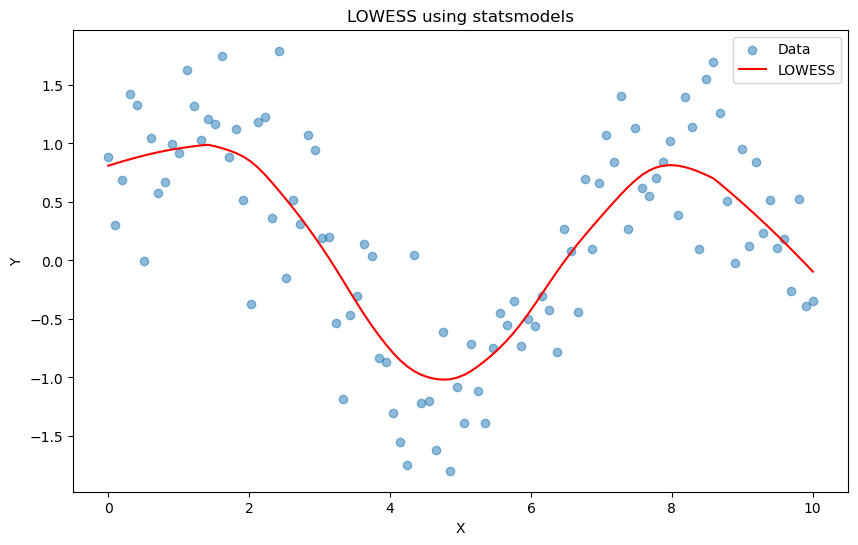

In [8]:
# Apply LOWESS
lowess = sm.nonparametric.lowess
lowess_result = lowess(y, x, frac=0.3)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(lowess_result[:, 0], lowess_result[:, 1], label='LOWESS', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LOWESS using statsmodels')
plt.show()

## LOESS algorithm

We now apply the LOESS algorithm using `loess` package. The `frac` parameter in the `loess` method plays a similar role as in the `lowess` method in `loess` of `statsmodels.api.nonparametric`.

In [7]:
# install loess package if required
# !pip install loess

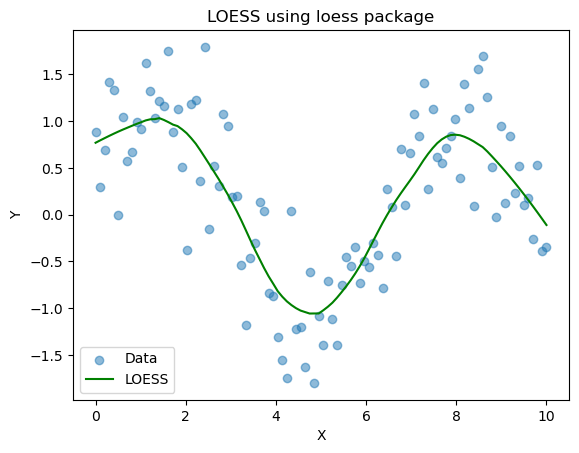

In [10]:
from loess.loess_1d import loess_1d

# Apply LOESS
loess_result = loess_1d(x, y, frac=0.3)

# Extract smoothed values
x_smooth = loess_result[0]
y_smooth = loess_result[1]

# Plot the results
plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(x_smooth, y_smooth, label='LOESS', color='green')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LOESS using loess package')
plt.show()


## Comparison of LOWESS and LOESS

We now put the two regressions in the same plot to compare them.

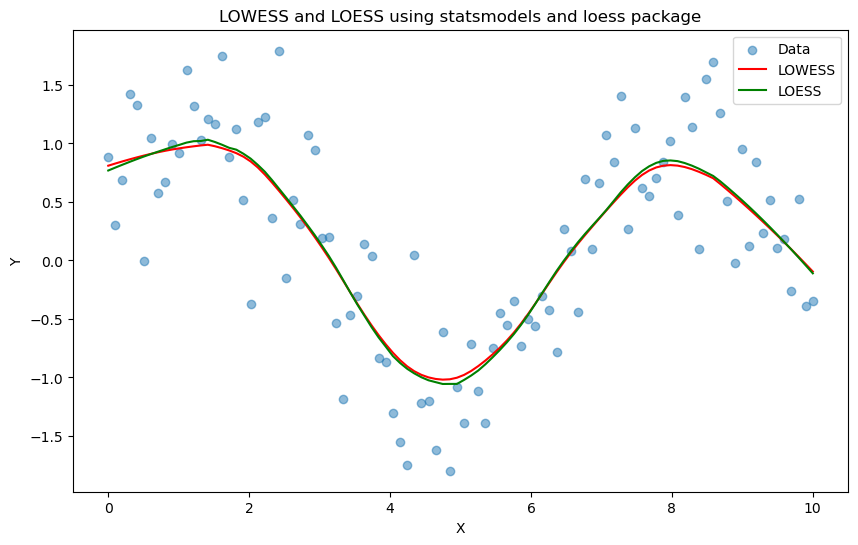

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(lowess_result[:, 0], lowess_result[:, 1], label='LOWESS', color='red')
plt.plot(x_smooth, y_smooth, label='LOESS', color='green')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LOWESS and LOESS using statsmodels and loess package')
plt.show()

As we can see, both LOWESS and LOESS provide good approximation to the data. Part of the reason why LOESS method is not included in the `statsmodels` package may be that, in most applications, the LOWESS method is good enough - and also slightly more computationally efficient, as LOWESS uses linear function for local regression while LOESS uses quadratic function for local regression.